In [ ]:
!pip install shap Lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f7c70329c96d559dfbe817397b3e573b24d9eee0d297e4c3084092187d2338c8
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built Lime


# Imports


In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import f_oneway
import scipy.stats as ss

#Dataset Load and EDA

In [ ]:
!gdown --id 1dMimghFmnCl0FDGuqJOUa-Ag9IdAxKWY

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dMimghFmnCl0FDGuqJOUa-Ag9IdAxKWY
To: /content/ASD_Screening_Data_for_Adult.zip
100% 54.1k/54.1k [00:00<00:00, 12.8MB/s]


In [ ]:
!unzip /content/ASD_Screening_Data_for_Adult.zip

Archive:  /content/ASD_Screening_Data_for_Adult.zip
  inflating: ASD_Screening_Data_for_Adult/Autism-Adult-Data.arff  
  inflating: ASD_Screening_Data_for_Adult/Autism-Adult-Data.csv  
  inflating: ASD_Screening_Data_for_Adult/Autism-Screening-Adult-Data Description.docx  


In [ ]:
df= pd.read_csv('/content/ASD_Screening_Data_for_Adult/Autism-Adult-Data.csv')
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [ ]:
df.tail()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO
703,704,1,0,1,1,1,0,1,1,1,...,f,White-European,no,no,Cyprus,no,8,18 and more,Self,YES


In [ ]:
df.describe()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,352.500000,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,4.875000
std,203.371581,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,2.501493
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,176.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,352.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,528.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,704.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


#Data Preprocess

In [ ]:
df.rename(columns={'austim': 'family_with_autism'}, inplace=True)
df.rename(columns={'Class/ASD': 'ASD'}, inplace=True)
df.rename(columns={'jundice': 'jaundice'}, inplace=True)

In [ ]:
df.head()


,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,family_with_autism,contry_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  704 non-null    int64 
 1   A1_Score            704 non-null    int64 
 2   A2_Score            704 non-null    int64 
 3   A3_Score            704 non-null    int64 
 4   A4_Score            704 non-null    int64 
 5   A5_Score            704 non-null    int64 
 6   A6_Score            704 non-null    int64 
 7   A7_Score            704 non-null    int64 
 8   A8_Score            704 non-null    int64 
 9   A9_Score            704 non-null    int64 
 10  A10_Score           704 non-null    int64 
 11  age                 704 non-null    object
 12  gender              704 non-null    object
 13  ethnicity           704 non-null    object
 14  jaundice            704 non-null    object
 15  family_with_autism  704 non-null    object
 16  contry_of_res       704 no

In [ ]:
# Place the column names to be dropped into a list
columns_to_drop = ["id","used_app_before","age_desc"]
df.drop(columns=columns_to_drop, axis=1, inplace=True)  # Specify 'columns' to indicate these are the columns to be dropped

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   A1_Score            704 non-null    int64 
 1   A2_Score            704 non-null    int64 
 2   A3_Score            704 non-null    int64 
 3   A4_Score            704 non-null    int64 
 4   A5_Score            704 non-null    int64 
 5   A6_Score            704 non-null    int64 
 6   A7_Score            704 non-null    int64 
 7   A8_Score            704 non-null    int64 
 8   A9_Score            704 non-null    int64 
 9   A10_Score           704 non-null    int64 
 10  age                 704 non-null    object
 11  gender              704 non-null    object
 12  ethnicity           704 non-null    object
 13  jaundice            704 non-null    object
 14  family_with_autism  704 non-null    object
 15  contry_of_res       704 non-null    object
 16  result              704 no

In [ ]:
# check unique values of each column
print("Unique values for ")
for column in df.columns:
  print(f"{column}: {df[column].unique()}")


Unique values for 
A1_Score: [1 0]
A2_Score: [1 0]
A3_Score: [1 0]
A4_Score: [1 0]
A5_Score: [0 1]
A6_Score: [0 1]
A7_Score: [1 0]
A8_Score: [1 0]
A9_Score: [0 1]
A10_Score: [0 1]
age: ['26' '24' '27' '35' '40' '36' '17' '64' '29' '33' '18' '31' '30' '34'
 '38' '42' '43' '48' '37' '55' '50' '53' '20' '28' '21' '383' '47' '32'
 '44' '?' '19' '58' '45' '22' '39' '25' '23' '54' '60' '41' '46' '56' '61'
 '59' '52' '49' '51']
gender: ['f' 'm']
ethnicity: ['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']
jaundice: ['no' 'yes']
family_with_autism: ['no' 'yes']
contry_of_res: ['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'In

In [ ]:
# Convert 'age' column to numeric, coercing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Calculate the mean of the numeric values in 'age' column (ignoring NaN)
mean_age = df['age'].mean(skipna=True)

# Convert mean_age to integer
mean_age_int = int(round(mean_age))

# Replace '?' in 'age' column with the calculated mean as an integer
df['age'] = df['age'].fillna(mean_age_int)

In [ ]:
# Replace '?' with 'Others'
df.replace('?', 'Others', inplace=True)

In [ ]:
# Replace '?' with 'Others'
df.replace('others', 'Others', inplace=True)

In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698864,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.483975,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


## Distribution of Data

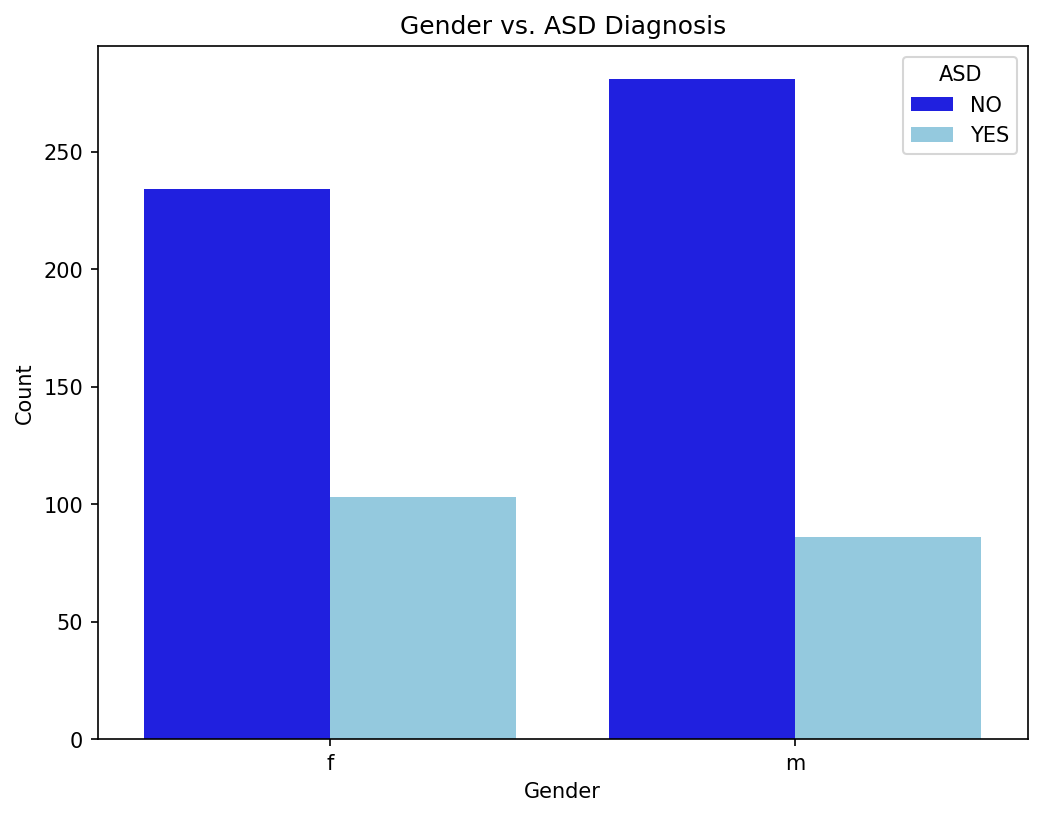

In [ ]:
plt.figure(figsize=(8, 6), dpi=150)
sns.countplot(x='gender', hue='ASD', data=df, palette=['blue', 'skyblue'])
plt.title('Gender vs. ASD Diagnosis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


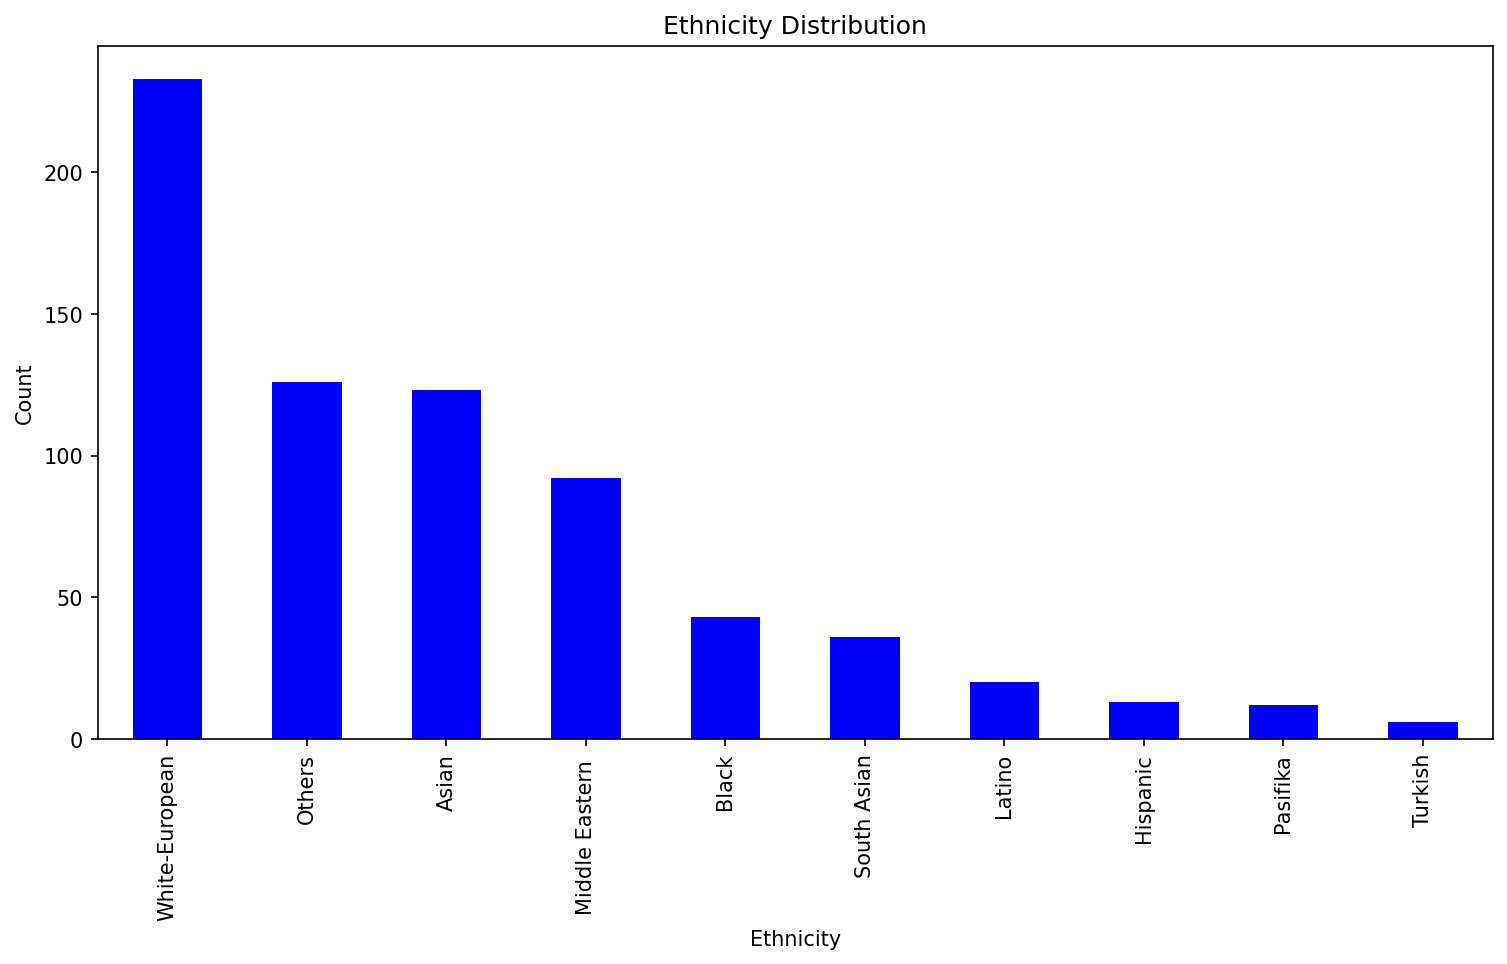

In [ ]:
plt.figure(figsize=(12, 6), dpi=150)
df['ethnicity'].value_counts().plot(kind='bar', color='blue')
plt.title("Ethnicity Distribution")
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()


# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

binary_columns = ['jaundice', 'family_with_autism', 'gender', 'ASD']
# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in binary_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Encode categorical columns
categorical_columns = ['ethnicity', 'contry_of_res', 'relation']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])



#Hypothesis Analysis

##Hypothesis 1: Gender and Autism Diagnosis


Null Hypothesis (H₀): There is no difference in the likelihood of being diagnosed with autism spectrum disorder (ASD) between male and female adolescents.



In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_gender = pd.crosstab(df['gender'], df['ASD'])

# Perform chi-square test
chi2_gender, p_gender, dof_gender, expected_gender = chi2_contingency(contingency_table_gender)

print(f"Chi-square value (gender): {chi2_gender}")
print(f"P-value (gender): {p_gender}")

# Interpretation
if p_gender < 0.05:
    print("There is a significant association between gender and autism diagnosis.")
else:
    print("There is no significant association between gender and autism diagnosis.")

Chi-square value (gender): 4.19243927038802
P-value (gender): 0.040604633334703925
There is a significant association between gender and autism diagnosis.


## Hypothesis 2: Ethnicity and Autism Diagnosis

Null Hypothesis (H₀): The likelihood of being diagnosed with autism spectrum disorder (ASD) does not vary among different ethnicities of adolescents.

In [ ]:
# Create a contingency table
contingency_table_ethnicity = pd.crosstab(df['ethnicity'], df['ASD'])

# Perform chi-square test
chi2_ethnicity, p_ethnicity, dof_ethnicity, expected_ethnicity = chi2_contingency(contingency_table_ethnicity)

print(f"Chi-square value (ethnicity): {chi2_ethnicity}")
print(f"P-value (ethnicity): {p_ethnicity}")

# Interpretation
if p_ethnicity < 0.05:
    print("There is a significant association between ethnicity and autism diagnosis.")
else:
    print("There is no significant association between ethnicity and autism diagnosis.")

Chi-square value (ethnicity): 104.67689815966551
P-value (ethnicity): 1.775732062855918e-18
There is a significant association between ethnicity and autism diagnosis.


## Hypothesis 3: Relationship Between Scores and Autism Diagnosis


Null Hypothesis (H₀): There is no relationship between the scores obtained in the assessment questions (A1_Score to A10_Score) and the likelihood of being diagnosed with autism spectrum disorder (ASD).

In [ ]:
from scipy.stats import pointbiserialr
import numpy as np

scores_columns = ["A1_Score", "A2_Score", "A3_Score", "A4_Score",
                  "A5_Score", "A6_Score", "A7_Score", "A8_Score",
                  "A9_Score", "A10_Score"]
diagnosis_column = 'ASD'

correlation_results = {}

# Variable to accumulate p-values
total_p_value = 0

for score_col in scores_columns:
    # Compute point-biserial correlation coefficient
    corr_coeff, p_value = pointbiserialr(df[score_col], df[diagnosis_column])
    correlation_results[score_col] = {
        'correlation_coefficient': corr_coeff,
        'p_value': p_value
    }
    # Add p_value to total
    total_p_value += p_value

# # Print results
# for score_col, result in correlation_results.items():
#     print(f"Score: {score_col}")
#     print(f"Correlation Coefficient: {result['correlation_coefficient']}")
#     print(f"P-value: {result['p_value']}")
#     print()

# Calculate overall correlation coefficient
overall_correlation = np.mean([result['correlation_coefficient'] for result in correlation_results.values()])
print(f"Overall Correlation Coefficient: {overall_correlation}")

# Calculate average p-value
average_p_value = total_p_value / len(scores_columns)
print(f"Average P-value: {average_p_value}")

# Interpretation
if average_p_value < 0.05:
    print("There is a significant relationship between the scores and ASD diagnosis.")
else:
    print("failed to reject: ")
    print("There is no significant relationship between the scores and ASD diagnosis.")


Overall Correlation Coefficient: 0.4259205645764415
Average P-value: 1.8593233280568118e-11
There is a significant relationship between the scores and ASD diagnosis.


## Hypothesis 4: Effect of Family History of Autism on ASD Diagnosis


Null Hypothesis (H₀): There is no association between having a family member diagnosed with autism spectrum disorder (ASD) and a child's likelihood of being diagnosed with ASD.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['family_with_autism'], df['ASD'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
print("Expected frequencies table:")
print(expected)
# Interpretation
if p < 0.05:
    print("There is a significant association between family history of autism and autism diagnosis.")
else:
    print("There is no significant association between family history of autism and autism diagnosis.")


Chi-square value: 20.981873499582953
P-value: 4.63649391560665e-06
Expected frequencies table:
[[448.43039773 164.56960227]
 [ 66.56960227  24.43039773]]
There is a significant association between family history of autism and autism diagnosis.


# Correlation matrix

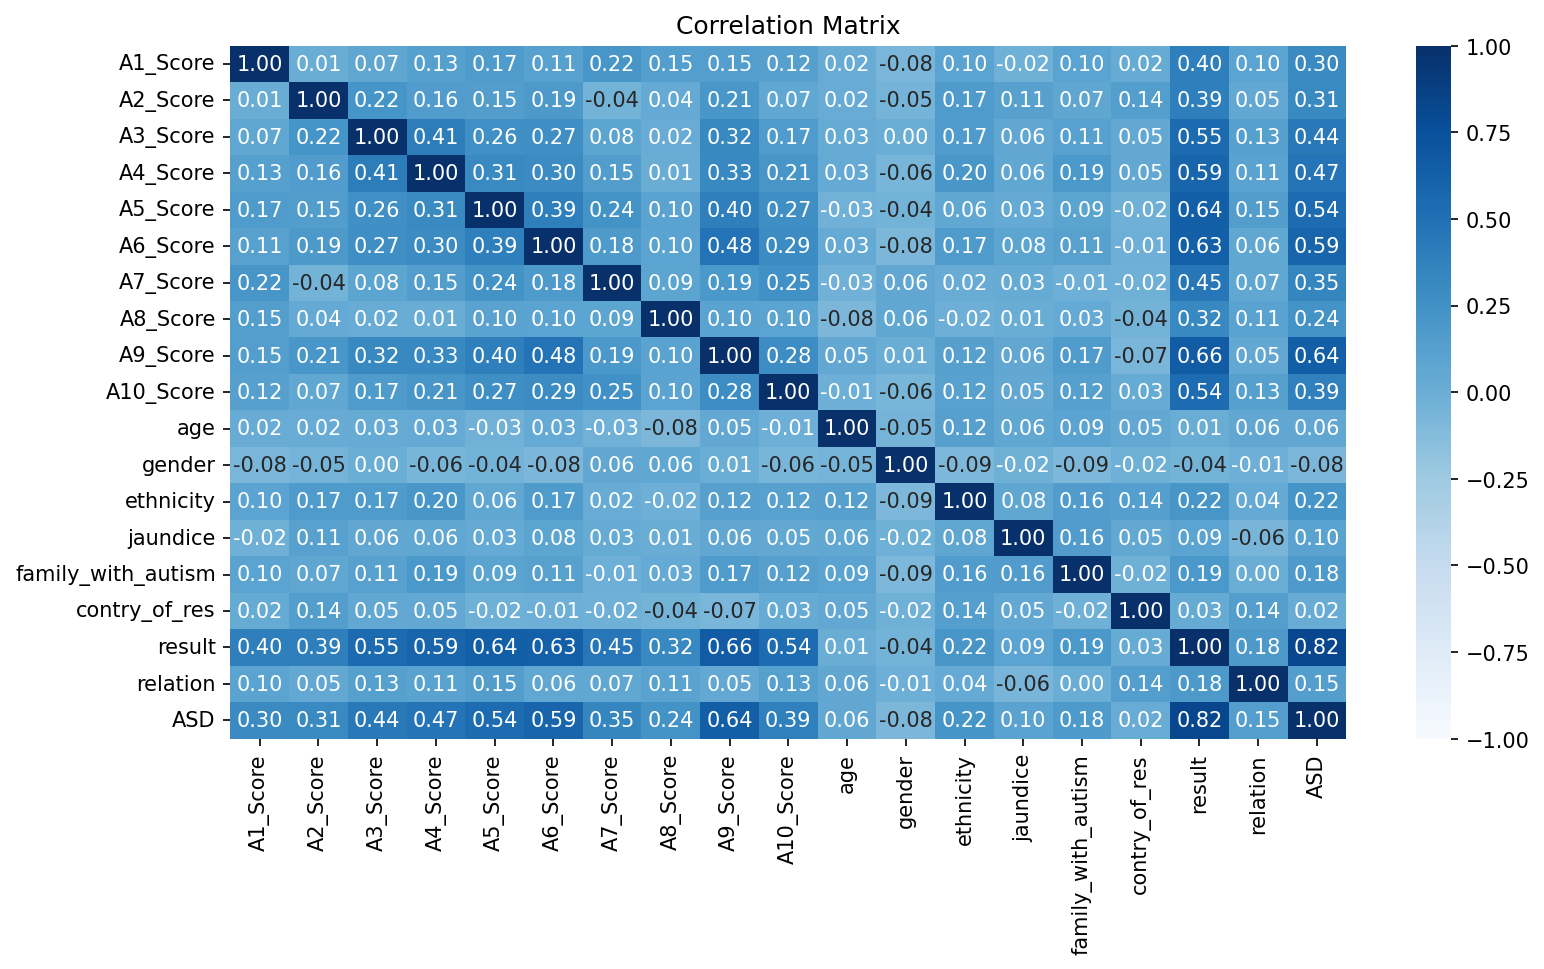

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 6), dpi = 150)
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Machine Learning

## Oversampling

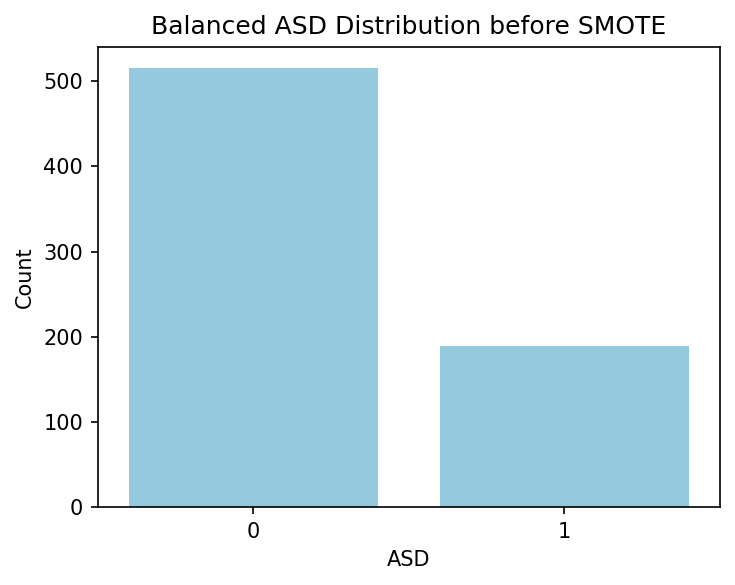

In [ ]:
plt.figure(figsize=(5, 4), dpi = 150)
sns.countplot(x="ASD", data = df, color="skyblue")  # Changed from palette to color
plt.title("Balanced ASD Distribution before SMOTE")
plt.xlabel("ASD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'family_with_autism', 'contry_of_res',
       'result', 'relation', 'ASD'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Features & target
X = df.drop("ASD", axis=1)
y = df["ASD"]

# Encode categorical features first (one-hot encoding)
#X = pd.get_dummies(X, drop_first=True)

print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({0: 515, 1: 189})
After SMOTE: Counter({0: 515, 1: 515})


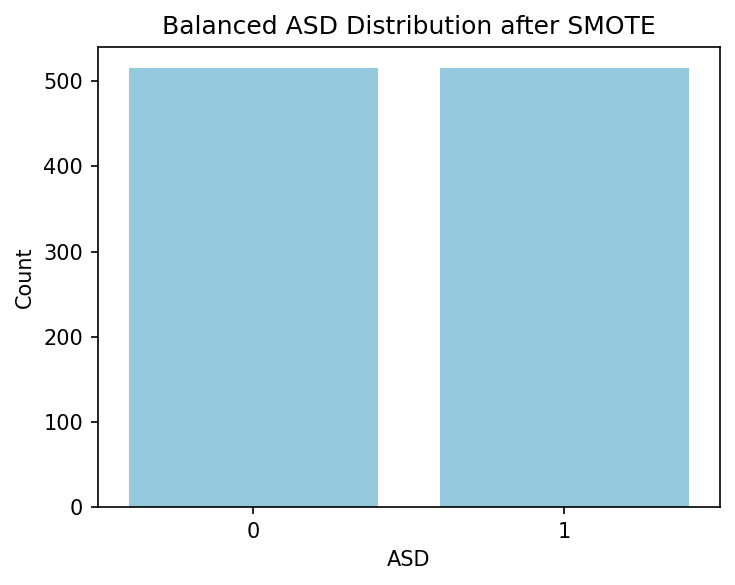

In [ ]:
plt.figure(figsize=(5, 4), dpi = 150)
sns.countplot(x=y_res, color="skyblue")  # Changed from palette to color
plt.title("Balanced ASD Distribution after SMOTE")
plt.xlabel("ASD")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Combine resampled features and target
df_balanced = pd.concat([pd.DataFrame(X_res, columns=X.columns),
                         pd.Series(y_res, name="ASD")], axis=1)

# Save to CSV
df_balanced.to_csv("ASD_balanced.csv", index=False)

print("✅ Balanced dataset saved successfully as 'ASD_balanced.csv'")
print("Shape:", df_balanced.shape)
df_balanced.head()


✅ Balanced dataset saved successfully as 'ASD_balanced.csv'
Shape: (1030, 19)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,family_with_autism,contry_of_res,result,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,6,4,0
1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,5,4,0
2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,8,2,1
3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,6,4,0
4,1,0,0,0,0,0,0,1,0,0,40.0,0,5,0,0,22,2,1,0


## Data Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ===== Load the balanced dataset (if needed) =====
#!gdown --id 13MUwyy034wDdZRPn6G4b69xFXbg96Vaz
#df_balanced = pd.read_csv("/content/ASD_Adolescent_balanced.csv")

# ===== Split features & target =====
X = df_balanced.drop("ASD", axis=1)
y = df_balanced["ASD"]

# ===== Train–test split (80% train, 20% test) =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# ===== Standardize numerical features =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and standardized!")
print(f"Scaled shapes -> X_train: {X_train_scaled.shape}, X_test: {X_test_scaled.shape}")


Training set shape: (824, 18) (824,)
Test set shape: (206, 18) (206,)
Data successfully split and standardized!
Scaled shapes -> X_train: (824, 18), X_test: (206, 18)


## Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score
from tqdm.notebook import tqdm  # or use `from tqdm import tqdm` if running in terminal

# Build the Neural Network
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Custom training loop with tqdm progress bar
epochs = 200
batch_size = 32
steps_per_epoch = len(X_train_scaled) // batch_size

history = {'loss': [], 'val_loss': []}

for epoch in tqdm(range(epochs), desc="Training Progress"):
    hist = model.fit(
        X_train_scaled, y_train,
        validation_split=0.2,
        epochs=1,
        batch_size=batch_size,
        verbose=0
    )
    history['loss'].append(hist.history['loss'][0])
    history['val_loss'].append(hist.history['val_loss'][0])

# Evaluate on test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.5).astype(int)


# ... after you compute y_pred_prob and y_pred
pr_auc = average_precision_score(y_test, y_pred_prob.ravel())



print(f"\nAccuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-score:  {f1_score(y_test, y_pred):.4f}")
print(f"PR-AUC:    {pr_auc:.4f}")


Training Progress:   0%|          | 0/200 [00:00<?, ?it/s]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step

Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000
PR-AUC:    1.0000


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             average_precision_score)
from scipy import stats
from tqdm.auto import tqdm

# ======================================
# 0) Data already loaded above:
# df_balanced = pd.read_csv("/content/ASD_Child_balanced.csv")
# X = df_balanced.drop("ASD", axis=1)
# y = df_balanced["ASD"]
# ======================================

# (Optional) reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# ========= Model factory =========
def build_asd_model(input_dim: int) -> tf.keras.Model:
    model = models.Sequential([
        layers.Input(shape=(X_train_scaled.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=[
            tf.keras.metrics.BinaryAccuracy(name='accuracy'),
            tf.keras.metrics.AUC(name='auc'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall'),
        ],
    )
    return model

def mean_ci(scores, confidence=0.95):
    scores = np.array(scores, dtype=float)
    mean = scores.mean()
    if len(scores) < 2:
        return mean, 0.0
    sem = stats.sem(scores)
    h = sem * stats.t.ppf((1 + confidence) / 2.0, len(scores) - 1)
    return mean, h

def take(a, idx):
    return a.iloc[idx] if hasattr(a, "iloc") else a[idx]

# ========= K-Fold CV =========
n_splits = 4
epochs = 200
batch_size = 32
rng = 42

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=rng)

accs, precs, recs, f1s, praucs = [], [], [], [], []

use_baseline = True
accs_bl, precs_bl, recs_bl, f1s_bl, praucs_bl = [], [], [], [], []

# FIX: use X, y (from balanced CSV), not X_res, y_res
for fold, (tr_idx, va_idx) in enumerate(tqdm(skf.split(X, y), total=n_splits, desc="K-Fold CV"), 1):
    X_tr, X_va = take(X, tr_idx), take(X, va_idx)
    y_tr, y_va = take(y, tr_idx), take(y, va_idx)

    # Scale within fold (avoid leakage)
    scaler = StandardScaler()
    X_tr_s = scaler.fit_transform(np.asarray(X_tr))
    X_va_s = scaler.transform(np.asarray(X_va))

    # Class weights per fold
    classes = np.unique(y_tr)
    cw_arr = compute_class_weight(class_weight='balanced', classes=classes, y=y_tr)
    class_weight = {int(c): w for c, w in zip(classes, cw_arr)}

    # Build & train model
    model = build_asd_model(X_tr_s.shape[1])
    es = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=8, min_lr=1e-5, verbose=0)

    model.fit(
        X_tr_s, y_tr,
        validation_data=(X_va_s, y_va),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weight,
        verbose=0,
        callbacks=[es, rlr]
    )

    # Predictions & fold metrics
    y_prob = model.predict(X_va_s, verbose=0).ravel()
    y_hat  = (y_prob >= 0.5).astype(int)

    accs.append(accuracy_score(y_va, y_hat))
    precs.append(precision_score(y_va, y_hat, zero_division=0))
    recs.append(recall_score(y_va, y_hat, zero_division=0))
    f1s.append(f1_score(y_va, y_hat, zero_division=0))
    praucs.append(average_precision_score(y_va, y_prob))   # PR-AUC

    # Baseline: Logistic Regression on same fold
    if use_baseline:
        from sklearn.linear_model import LogisticRegression
        bl = LogisticRegression(max_iter=1000)
        bl.fit(X_tr_s, y_tr)
        bl_prob = bl.predict_proba(X_va_s)[:, 1]
        bl_hat  = (bl_prob >= 0.5).astype(int)

        accs_bl.append(accuracy_score(y_va, bl_hat))
        precs_bl.append(precision_score(y_va, bl_hat, zero_division=0))
        recs_bl.append(recall_score(y_va, bl_hat, zero_division=0))
        f1s_bl.append(f1_score(y_va, bl_hat, zero_division=0))
        praucs_bl.append(average_precision_score(y_va, bl_prob))

def report_metric(name, vals):
    m, h = mean_ci(vals, confidence=0.95)
    print(f"{name:9s}: {m:.4f} ± {h:.4f} (95% CI)  | folds={len(vals)}")

print("\n=== Neural Network (Stratified K-Fold) ===")
report_metric("Accuracy",  accs)
report_metric("Precision", precs)
report_metric("Recall",    recs)
report_metric("F1-score",  f1s)
report_metric("PR-AUC",    praucs)

# ========= Paired significance vs baseline (same folds) =========
if use_baseline:
    def paired_tests(name, a, b):
        a = np.asarray(a, float); b = np.asarray(b, float)
        d = a - b  # per-fold differences

        # Paired t-test
        t_stat, p_t = stats.ttest_rel(a, b)

        # Wilcoxon signed-rank (non-parametric)
        try:
            w_stat, p_w = stats.wilcoxon(a, b, zero_method='wilcox')
        except ValueError:
            w_stat, p_w = np.nan, np.nan  # e.g., all differences zero

        # Effect size for paired t: Cohen's dz
        dz = d.mean() / (d.std(ddof=1) + 1e-12)

        # 95% CI for mean difference
        n = len(d)
        se = d.std(ddof=1) / np.sqrt(n) if n > 1 else 0.0
        h = se * stats.t.ppf(0.975, n-1) if n > 1 else 0.0
        ci_lo, ci_hi = d.mean() - h, d.mean() + h

        print(f"{name:9s}: Δmean={d.mean():+.4f}  95% CI [{ci_lo:+.4f}, {ci_hi:+.4f}]  "
              f"| t p={p_t:.4f}  Wilcoxon p={p_w:.4f}  | dz={dz:.3f}")

    print("\n=== NN vs Logistic Regression (paired over folds) ===")
    paired_tests("Accuracy",  accs,    accs_bl)
    paired_tests("Precision", precs,   precs_bl)
    paired_tests("Recall",    recs,    recs_bl)
    paired_tests("F1-score",  f1s,     f1s_bl)
    paired_tests("PR-AUC",    praucs,  praucs_bl)


K-Fold CV:   0%|          | 0/4 [00:00<?, ?it/s]


=== Neural Network (Stratified K-Fold) ===
Accuracy : 0.9748 ± 0.0255 (95% CI)  | folds=4
Precision: 0.9625 ± 0.0342 (95% CI)  | folds=4
Recall   : 0.9884 ± 0.0159 (95% CI)  | folds=4
F1-score : 0.9752 ± 0.0247 (95% CI)  | folds=4
PR-AUC   : 0.9977 ± 0.0027 (95% CI)  | folds=4

=== NN vs Logistic Regression (paired over folds) ===
Accuracy : Δmean=-0.0126  95% CI [-0.0219, -0.0034]  | t p=0.0226  Wilcoxon p=0.1250  | dz=-2.169
Precision: Δmean=-0.0167  95% CI [-0.0275, -0.0058]  | t p=0.0163  Wilcoxon p=0.1250  | dz=-2.448
Recall   : Δmean=-0.0078  95% CI [-0.0178, +0.0023]  | t p=0.0917  Wilcoxon p=0.2500  | dz=-1.225
F1-score : Δmean=-0.0123  95% CI [-0.0213, -0.0033]  | t p=0.0223  Wilcoxon p=0.1250  | dz=-2.181
PR-AUC   : Δmean=-0.0020  95% CI [-0.0044, +0.0004]  | t p=0.0766  Wilcoxon p=0.1250  | dz=-1.328


###Evaluation

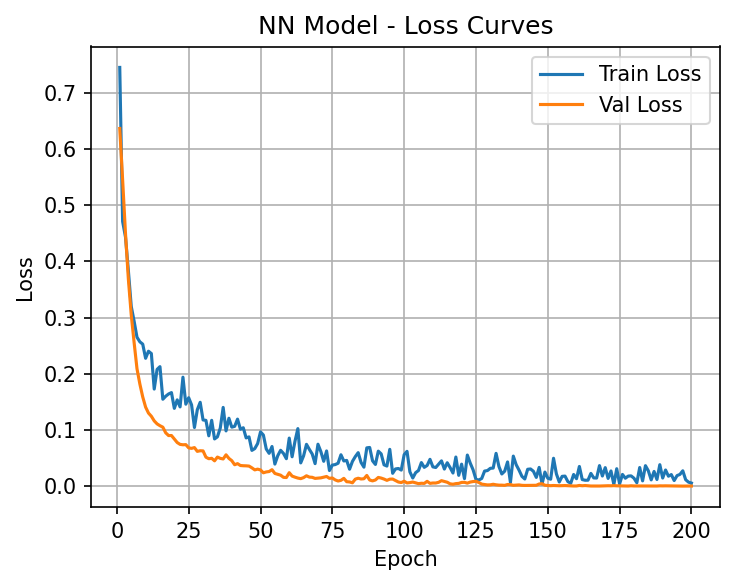

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss curves
epochs_range = range(1, len(history['loss']) + 1)

plt.figure(figsize=(5,4), dpi=150)
plt.plot(epochs_range, history['loss'], label='Train Loss')
plt.plot(epochs_range, history['val_loss'], label='Val Loss')
plt.title('NN Model - Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


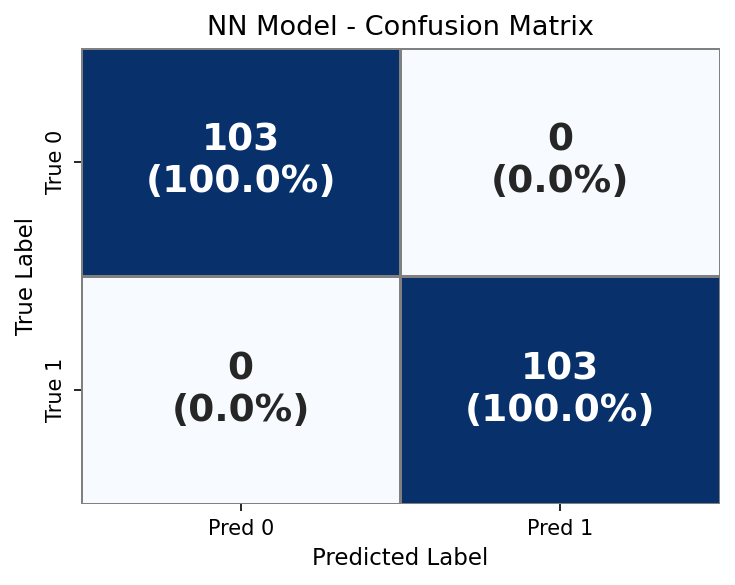

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix (row-normalized)
cm = confusion_matrix(y_test, y_pred)
cm_row_perc = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # each row = 100%

# Create labeled annotations (count + row %)
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_row_perc[i, j]
        annot[i, j] = f"{c}\n({p:.1f}%)"

# Plot heatmap with larger inside text
plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(cm_row_perc, annot=annot, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"],
            linewidths=0.5, linecolor='gray',
            annot_kws={"size": 18, "weight": "bold"})  # increased font size here

plt.title("NN Model - Confusion Matrix", fontsize=13)
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)
plt.tight_layout()
plt.show()


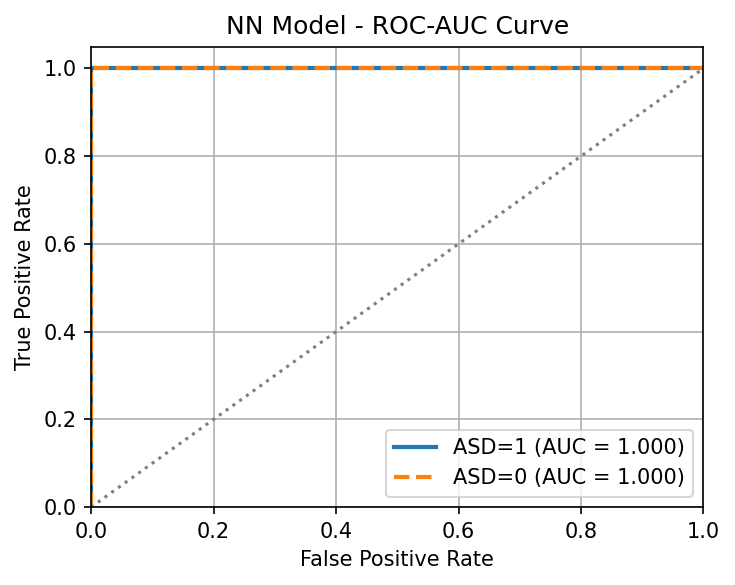

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Ensure 1-D array
y_score = np.asarray(y_pred_prob).ravel()

# ROC for positive class (ASD = 1)
fpr_pos, tpr_pos, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc_pos = auc(fpr_pos, tpr_pos)

# ROC for negative class (ASD = 0)
fpr_neg, tpr_neg, _ = roc_curve(1 - y_test, 1 - y_score, pos_label=1)
roc_auc_neg = auc(fpr_neg, tpr_neg)

# Plot both ROC curves
plt.figure(figsize=(5,4), dpi=150)
plt.plot(fpr_pos, tpr_pos, label=f'ASD=1 (AUC = {roc_auc_pos:.3f})', linewidth=2)
plt.plot(fpr_neg, tpr_neg, label=f'ASD=0 (AUC = {roc_auc_neg:.3f})', linewidth=2, linestyle='--')

# Random-chance line
plt.plot([0,1], [0,1], linestyle=':', color='gray')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NN Model - ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


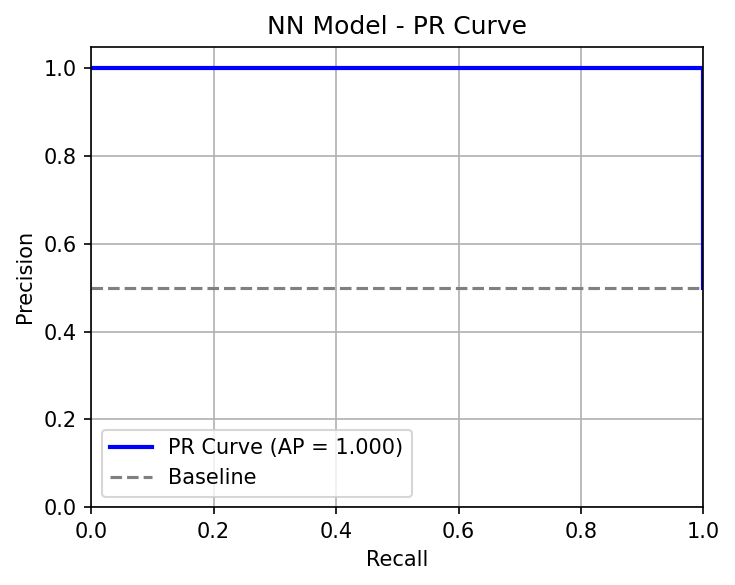

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision-recall pairs and AUC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
ap = average_precision_score(y_test, y_pred_prob)

# Plot Precision–Recall curve
plt.figure(figsize=(5,4), dpi=150)
plt.plot(recall, precision, color='blue', linewidth=2,
         label=f'PR Curve (AP = {ap:.3f})')

# Add baseline (random classifier)
positive_ratio = sum(y_test) / len(y_test)
plt.hlines(positive_ratio, 0, 1, colors='gray', linestyles='--', label='Baseline')

plt.title('NN Model - PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


###Save Model

In [ ]:
group = "Adult"

In [ ]:
# ===== Save model as .tflite =====
import tensorflow as tf

# 1️⃣ Save the Keras model first (optional)
model.save(f"asd_model_{group}.h5")

# 2️⃣ Convert to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# 3️⃣ Save the TFLite model to disk
with open(f"asd_model_{group}.tflite", "wb") as f:
    f.write(tflite_model)

print(f"ASD model successfully converted and saved as 'asd_model_{group}.tflite'")


Saved artifact at '/tmp/tmpq4nqjz0t'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 18), dtype=tf.float32, name='keras_tensor_56')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  134629541865488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541868368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541862800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541863760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541863952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541862032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541862416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541866064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541865872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541868944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134629541869520: Ten

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,877 (171.40 KB)

 Trainable params: 14,433 (56.38 KB)

 Non-trainable params: 576 (2.25 KB)

 Optimizer params: 28,868 (112.77 KB)

###SHAP

In [ ]:
import numpy as np
import shap
import matplotlib.pyplot as plt

In [ ]:
feature_names = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score',
                 'A7_Score','A8_Score','A9_Score','A10_Score','age','gender',
                 'ethnicity','jaundice','family_with_autism','contry_of_res',
                 'result','relation']

/usr/local/lib/python3.12/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(100, 18))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(200, 18))']
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_56
Received: inputs=['Tensor(shape=(206, 18))']
  warning

✅ SHAP values computed. Shape: (206, 18)


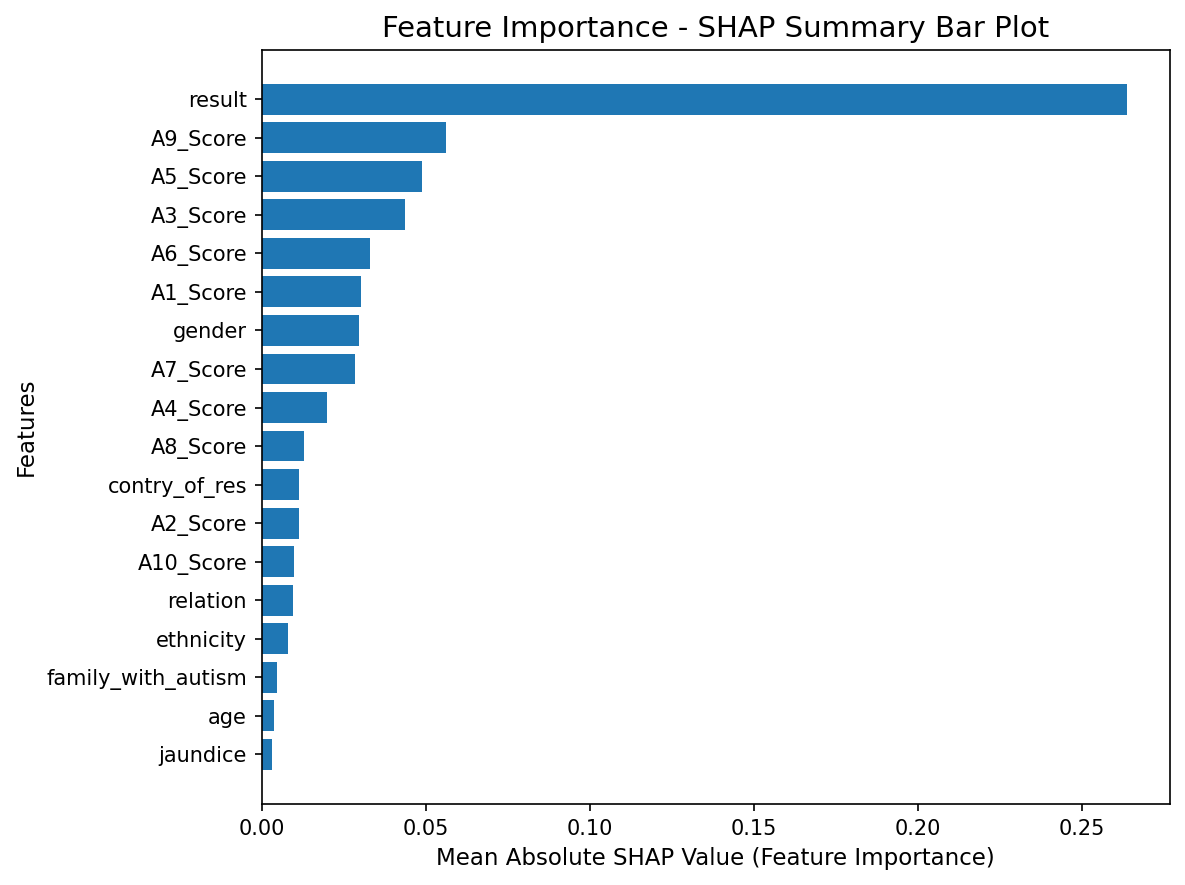

In [ ]:
# ======================================================
# STEP 1: Install and import SHAP
# ======================================================
# !pip install shap --quiet
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ======================================================
# STEP 2: Prepare background data and feature names
# ======================================================
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# Your feature names
feature_names = ['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score',
                 'A7_Score','A8_Score','A9_Score','A10_Score','age','gender',
                 'ethnicity','jaundice','family_with_autism','contry_of_res',
                 'result','relation']

# ======================================================
# STEP 3: Create SHAP explainer and compute shap_values
# ======================================================
try:
    explainer = shap.DeepExplainer(model, background)
    shap_values = explainer.shap_values(X_test_scaled)
except Exception as e:
    print(f"DeepExplainer failed ({e}). Falling back to KernelExplainer (slower).")
    f = lambda x: model.predict(x, verbose=0)
    explainer = shap.KernelExplainer(f, background)
    shap_values = explainer.shap_values(X_test_scaled[:200], nsamples="auto")

# ======================================================
# STEP 4: Handle shap_values shape correctly
# ======================================================
# shap_values may be a list (for multi-output models)
if isinstance(shap_values, list):
    shap_vals = np.squeeze(shap_values[0])
else:
    shap_vals = np.squeeze(shap_values)

print("✅ SHAP values computed. Shape:", shap_vals.shape)

# ======================================================
# STEP 5: Compute mean |SHAP| per feature
# ======================================================
mean_abs_shap = np.mean(np.abs(shap_vals), axis=0)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Mean |SHAP|": mean_abs_shap
}).sort_values("Mean |SHAP|", ascending=True)

# ======================================================
# STEP 6: Plot SHAP Feature Importance Bar Plot
# ======================================================
plt.figure(figsize=(8,6), dpi=150)
plt.barh(importance_df["Feature"], importance_df["Mean |SHAP|"], color="#1f77b4")
plt.xlabel("Mean Absolute SHAP Value (Feature Importance)", fontsize=11)
plt.ylabel("Features", fontsize=11)
plt.title("Feature Importance - SHAP Summary Bar Plot", fontsize=14, color="black")
plt.tight_layout()
plt.show()


###Lime

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from collections import defaultdict

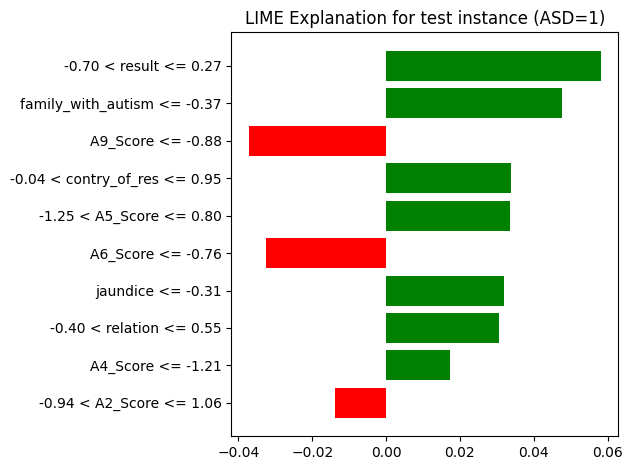

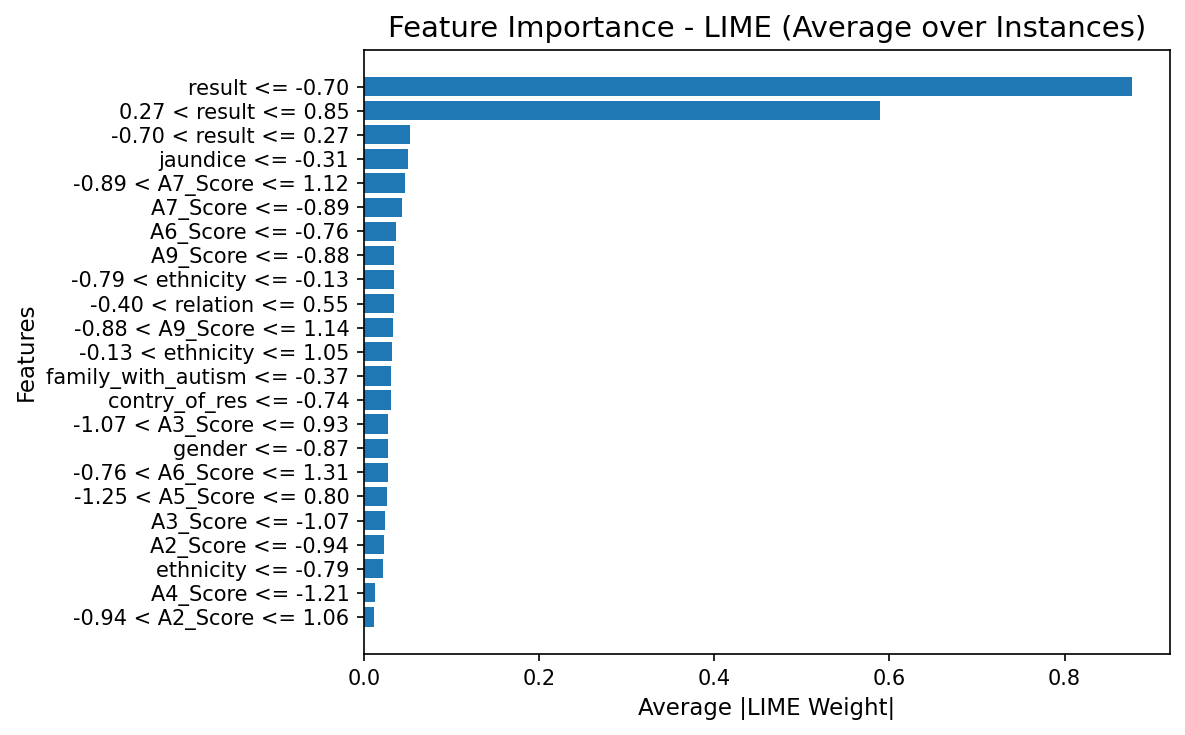

In [ ]:
# ---------- 0) Feature names (robust) ----------
try:
    # If you have the original dataframe:
    feature_names = [c for c in df.columns if c != "ASD"]
except NameError:
    # Fallback: autogenerate from scaled data
    feature_names = [f"Feature_{i+1}" for i in range(np.asarray(X_train_scaled).shape[1])]

# Safety: ensure length matches
if len(feature_names) != np.asarray(X_train_scaled).shape[1]:
    feature_names = [f"Feature_{i+1}" for i in range(np.asarray(X_train_scaled).shape[1])]

class_names = ["ASD=0", "ASD=1"]

# ---------- 1) Wrap predict_proba for LIME ----------
def predict_proba_fn(X):
    X = np.asarray(X)
    p1 = model.predict(X, verbose=0).ravel()     # sigmoid outputs for class 1
    p0 = 1.0 - p1
    return np.vstack([p0, p1]).T                 # shape (n, 2)

# ---------- 2) Build explainer on training data ----------
X_tr = np.asarray(X_train_scaled)
X_te = np.asarray(X_test_scaled)

explainer = LimeTabularExplainer(
    training_data=X_tr,
    feature_names=feature_names,
    class_names=class_names,
    mode="classification",
    discretize_continuous=True,
    sample_around_instance=True,
    random_state=42
)

# ---------- 3) Explain one instance ----------
i = 0  # change to inspect another test sample
exp = explainer.explain_instance(
    data_row=X_te[i],
    predict_fn=predict_proba_fn,
    num_features=min(10, X_tr.shape[1])
)

# Plot single-instance explanation
fig = exp.as_pyplot_figure(label=1)  # explain class ASD=1
plt.title(f"LIME Explanation for test instance (ASD=1)")
plt.tight_layout()
plt.show()

# # Print top features for that instance
# print("Top contributing features (class ASD=1):")
# for feat, weight in exp.as_list(label=1):
#     print(f"{feat:40s} {weight:+.4f}")

# ---------- 4) Batch explain a few instances & aggregate ----------
all_weights = []
k = min(5, len(X_te))  # explain first k test samples
for idx in range(k):
    e = explainer.explain_instance(X_te[idx], predict_proba_fn, num_features=10)
    weights = dict(e.as_list(label=1))  # feature -> weight toward ASD=1
    all_weights.append(weights)

# Average absolute weights across explained instances
agg = defaultdict(list)
for w in all_weights:
    for kf, val in w.items():
        agg[kf].append(abs(val))

summary = sorted(((k, np.mean(v)) for k, v in agg.items()),
                 key=lambda x: x[1], reverse=True)

# print("\nAverage |LIME weight| over instances (top 10):")
# for kf, v in summary[:10]:
#     print(f"{kf:40s} {v:.4f}")

# ---------- 5) Plot horizontal bar chart ----------
features = [x[0] for x in summary]
weights  = [x[1] for x in summary]

plt.figure(figsize=(8,5), dpi=150)
plt.barh(features[::-1], weights[::-1], color="#1f77b4")
plt.xlabel("Average |LIME Weight|", fontsize=11)
plt.ylabel("Features", fontsize=11)
plt.title("Feature Importance - LIME (Average over Instances)",
          fontsize=14, color="black")
plt.tight_layout()
plt.show()


##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix, classification_report)

# ---- Train SVM (RBF) ----
svm = SVC(kernel="rbf", C=1.0, gamma="scale",
          probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# ---- Predict ----
y_prob = svm.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# ---- Metrics ----
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_prob)
prauc= average_precision_score(y_test, y_prob)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"PR-AUC   : {prauc:.4f}")

Accuracy : 0.9563
Precision: 0.9434
Recall   : 0.9709
F1-score : 0.9569
PR-AUC   : 0.9946


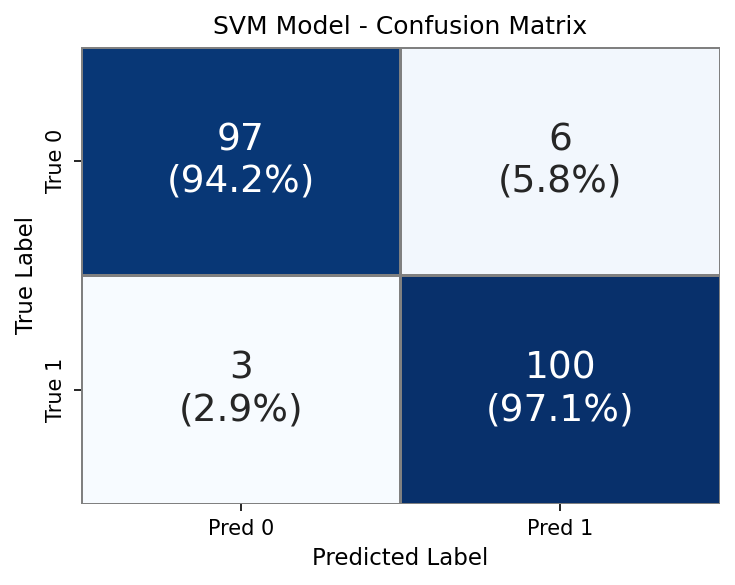

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_row_perc = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # each row sums to 100%

# Create labeled annotations (count + percentage)
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_row_perc[i, j]
        annot[i, j] = f"{c}\n({p:.1f}%)"

# Plot heatmap
plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(cm_row_perc, annot=annot, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["True 0", "True 1"],
            linewidths=0.5, linecolor='gray',
            annot_kws={"size": 18})

plt.title(f"SVM Model - Confusion Matrix",
          fontsize=12, color='black')
plt.xlabel("Predicted Label", fontsize=11)
plt.ylabel("True Label", fontsize=11)
plt.tight_layout()
plt.show()


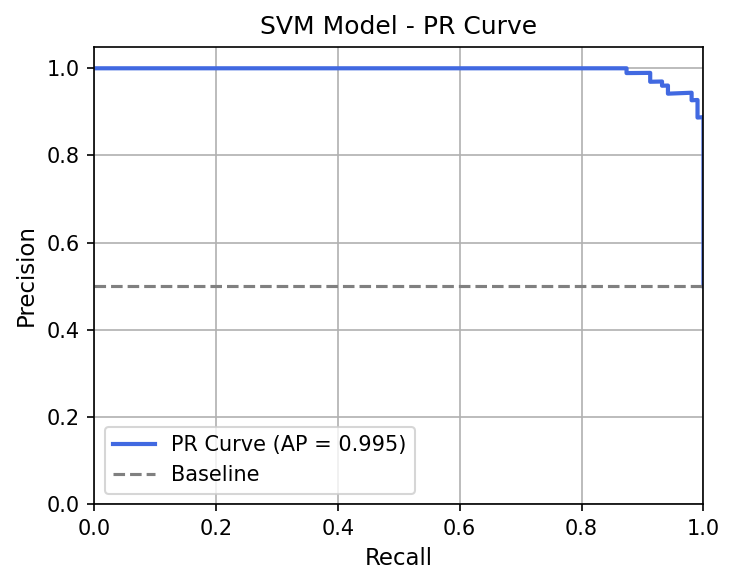

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute precision, recall, thresholds, and average precision
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

# Plot Precision–Recall curve
plt.figure(figsize=(5,4), dpi=150)
plt.plot(recall, precision, color='royalblue', linewidth=2,
         label=f'PR Curve (AP = {ap:.3f})')

# Baseline: positive class proportion
baseline = sum(y_test) / len(y_test)
plt.hlines(baseline, 0, 1, colors='gray', linestyles='--', label='Baseline')

plt.title('SVM Model - PR Curve', fontsize=12, color='black')
plt.xlabel('Recall', fontsize=11)
plt.ylabel('Precision', fontsize=11)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()


##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score,
                             confusion_matrix, classification_report, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ===== Train Logistic Regression =====
logreg = LogisticRegression(
    solver="lbfgs",        # good default
    max_iter=1000,         # ensure convergence
    class_weight="balanced",  # helpful if classes imbalanced
    random_state=42
)
logreg.fit(X_train_scaled, y_train)

# ===== Predict =====
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

# ===== Metrics =====
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec  = recall_score(y_test, y_pred, zero_division=0)
f1   = f1_score(y_test, y_pred, zero_division=0)
roc  = roc_auc_score(y_test, y_prob)
prauc= average_precision_score(y_test, y_prob)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"PR-AUC   : {prauc:.4f}")


Accuracy : 0.9854
Precision: 0.9717
Recall   : 1.0000
F1-score : 0.9856
PR-AUC   : 0.9998


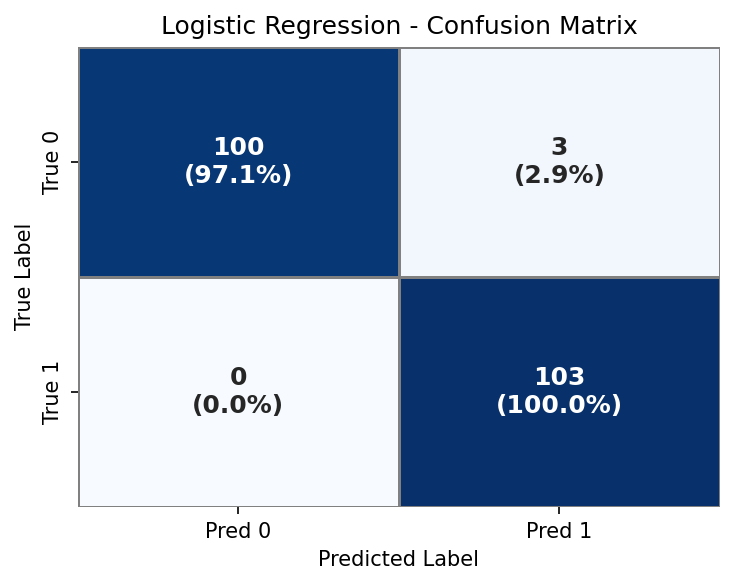

In [ ]:
# ===== Confusion Matrix (row-normalized) =====
cm = confusion_matrix(y_test, y_pred)
cm_row_perc = cm.astype(float) / cm.sum(axis=1, keepdims=True) * 100
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n({cm_row_perc[i, j]:.1f}%)"

plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(cm_row_perc, annot=annot, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"],
            linewidths=0.5, linecolor="gray", annot_kws={"size":12,"weight":"bold"})
plt.title(f"Logistic Regression - Confusion Matrix",
          fontsize=12)
plt.xlabel("Predicted Label"); plt.ylabel("True Label")
plt.tight_layout(); plt.show()

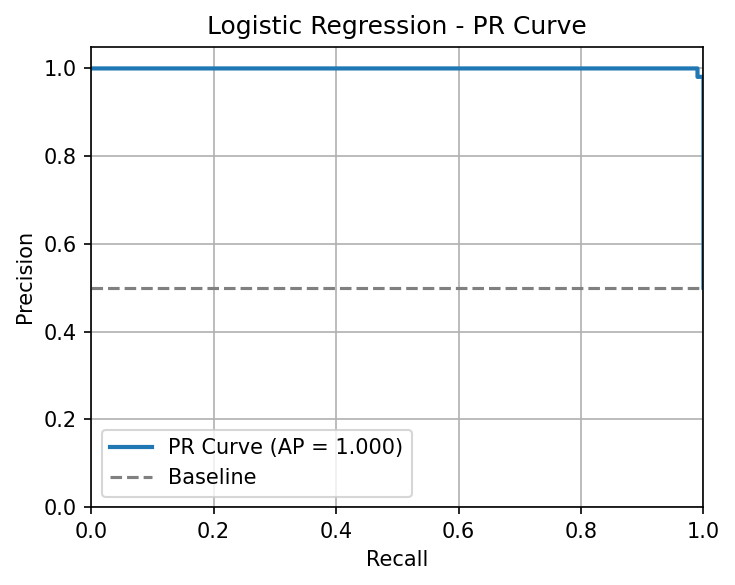

In [ ]:
# ===== Precision–Recall Curve =====
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(5,4), dpi=150)
plt.plot(recall, precision, linewidth=2, label=f'PR Curve (AP = {prauc:.3f})')
baseline = sum(y_test) / len(y_test)
plt.hlines(baseline, 0, 1, colors='gray', linestyles='--', label='Baseline')
plt.title('Logistic Regression - PR Curve', fontsize=12)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.xlim([0,1]); plt.ylim([0,1.05]); plt.legend(loc='lower left'); plt.grid(True)
plt.tight_layout(); plt.show()

##Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, average_precision_score, confusion_matrix, precision_recall_curve)
import seaborn as sns, matplotlib.pyplot as plt, numpy as np

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_prob = gnb.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"PR-AUC   : {average_precision_score(y_test, y_prob):.4f}")


Accuracy : 0.9466
Precision: 0.9340
Recall   : 0.9612
F1-score : 0.9474
PR-AUC   : 0.9904


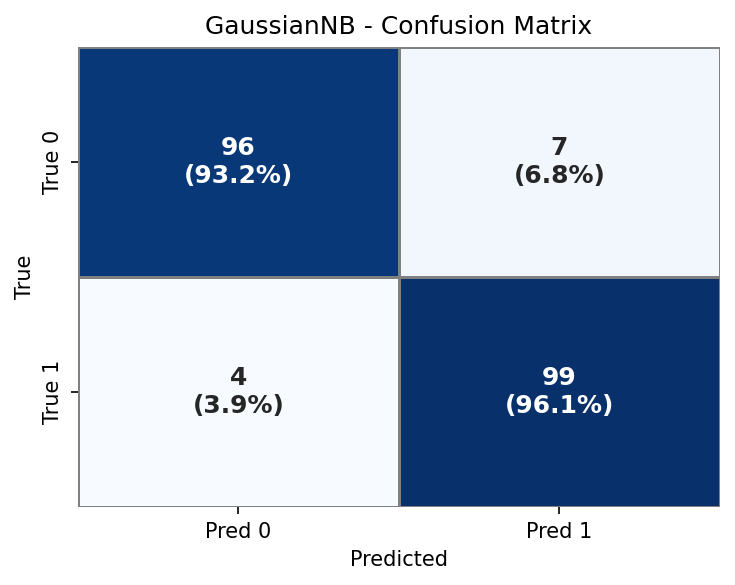

In [ ]:
# Confusion matrix (row-normalized)
cm = confusion_matrix(y_test, y_pred)
cm_row = cm.astype(float) / cm.sum(axis=1, keepdims=True) * 100
annot = np.array([[f"{cm[i,j]}\n({cm_row[i,j]:.1f}%)" for j in range(cm.shape[1])] for i in range(cm.shape[0])])

plt.figure(figsize=(5,4), dpi=150)
sns.heatmap(cm_row, annot=annot, fmt="", cmap="Blues", cbar=False,
            xticklabels=["Pred 0","Pred 1"], yticklabels=["True 0","True 1"],
            linewidths=.5, linecolor="gray", annot_kws={"size":12,"weight":"bold"})
plt.title("GaussianNB - Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("True")
plt.tight_layout(); plt.show()

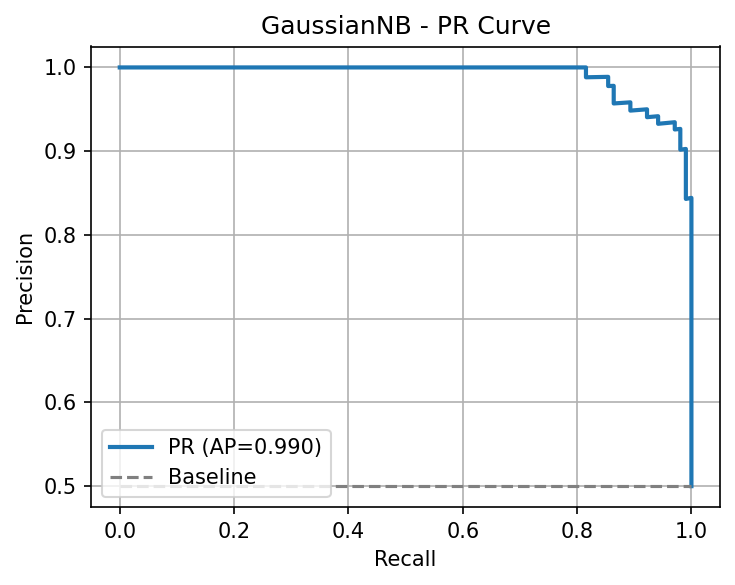

In [ ]:
# PR curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
plt.figure(figsize=(5,4), dpi=150)
plt.plot(recall, precision, lw=2, label=f'PR (AP={ap:.3f})')
plt.hlines(sum(y_test)/len(y_test), 0, 1, colors='gray', linestyles='--', label='Baseline')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('GaussianNB - PR Curve')
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()